Volumetric wavelet Data Processing
==================================

*Important:* Please read the [installation page](http://gpeyre.github.io/numerical-tours/installation_python/) for details about how to install the toolboxes.
$\newcommand{\dotp}[2]{\langle #1, #2 \rangle}$
$\newcommand{\enscond}[2]{\lbrace #1, #2 \rbrace}$
$\newcommand{\pd}[2]{ \frac{ \partial #1}{\partial #2} }$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\umax}[1]{\underset{#1}{\max}\;}$
$\newcommand{\umin}[1]{\underset{#1}{\min}\;}$
$\newcommand{\uargmin}[1]{\underset{#1}{argmin}\;}$
$\newcommand{\norm}[1]{\|#1\|}$
$\newcommand{\abs}[1]{\left|#1\right|}$
$\newcommand{\choice}[1]{ \left\{  \begin{array}{l} #1 \end{array} \right. }$
$\newcommand{\pa}[1]{\left(#1\right)}$
$\newcommand{\diag}[1]{{diag}\left( #1 \right)}$
$\newcommand{\qandq}{\quad\text{and}\quad}$
$\newcommand{\qwhereq}{\quad\text{where}\quad}$
$\newcommand{\qifq}{ \quad \text{if} \quad }$
$\newcommand{\qarrq}{ \quad \Longrightarrow \quad }$
$\newcommand{\ZZ}{\mathbb{Z}}$
$\newcommand{\CC}{\mathbb{C}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\EE}{\mathbb{E}}$
$\newcommand{\Zz}{\mathcal{Z}}$
$\newcommand{\Ww}{\mathcal{W}}$
$\newcommand{\Vv}{\mathcal{V}}$
$\newcommand{\Nn}{\mathcal{N}}$
$\newcommand{\NN}{\mathcal{N}}$
$\newcommand{\Hh}{\mathcal{H}}$
$\newcommand{\Bb}{\mathcal{B}}$
$\newcommand{\Ee}{\mathcal{E}}$
$\newcommand{\Cc}{\mathcal{C}}$
$\newcommand{\Gg}{\mathcal{G}}$
$\newcommand{\Ss}{\mathcal{S}}$
$\newcommand{\Pp}{\mathcal{P}}$
$\newcommand{\Ff}{\mathcal{F}}$
$\newcommand{\Xx}{\mathcal{X}}$
$\newcommand{\Mm}{\mathcal{M}}$
$\newcommand{\Ii}{\mathcal{I}}$
$\newcommand{\Dd}{\mathcal{D}}$
$\newcommand{\Ll}{\mathcal{L}}$
$\newcommand{\Tt}{\mathcal{T}}$
$\newcommand{\si}{\sigma}$
$\newcommand{\al}{\alpha}$
$\newcommand{\la}{\lambda}$
$\newcommand{\ga}{\gamma}$
$\newcommand{\Ga}{\Gamma}$
$\newcommand{\La}{\Lambda}$
$\newcommand{\si}{\sigma}$
$\newcommand{\Si}{\Sigma}$
$\newcommand{\be}{\beta}$
$\newcommand{\de}{\delta}$
$\newcommand{\De}{\Delta}$
$\newcommand{\phi}{\varphi}$
$\newcommand{\th}{\theta}$
$\newcommand{\om}{\omega}$
$\newcommand{\Om}{\Omega}$

This numerical tour explores volumetric (3D) data processing.

In [1]:
using PyPlot
using NtToolBox
using Autoreload
arequire("NtToolBox")
areload()


  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:1
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:7
  likely near C:\Users\Ayman\.julia\v0.5\Autoreload\src\constants.jl:12
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  likely near In[1]:4
  like

3D Volumetric Datasets
----------------------


We load a volumetric data.

In [2]:
M = NtToolBox.read_bin("NtToolBox/src/data/vessels.bin", 3)

128×128×128 Array{UInt8,3}:
[:, :, 1] =
 0x13  0x12  0x17  0x14  0x12  0x12  …  0x12  0x18  0x16  0x12  0x0d  0x1c
 0x13  0x11  0x14  0x16  0x16  0x17     0x14  0x17  0x14  0x0e  0x10  0x13
 0x11  0x14  0x13  0x15  0x1c  0x1d     0x0a  0x0e  0x10  0x13  0x13  0x14
 0x14  0x14  0x18  0x17  0x16  0x17     0x0a  0x12  0x15  0x1b  0x16  0x17
 0x11  0x14  0x17  0x19  0x1a  0x1c     0x11  0x13  0x12  0x13  0x15  0x14
 0x0e  0x0f  0x12  0x17  0x22  0x2b  …  0x1b  0x17  0x15  0x14  0x14  0x14
 0x19  0x11  0x0f  0x13  0x21  0x32     0x24  0x1e  0x1a  0x12  0x11  0x16
 0x19  0x14  0x11  0x11  0x14  0x1e     0x18  0x18  0x1a  0x18  0x15  0x17
 0x12  0x16  0x0f  0x0b  0x0b  0x14     0x15  0x16  0x15  0x17  0x1a  0x18
 0x11  0x12  0x11  0x0e  0x0b  0x0e     0x14  0x13  0x12  0x10  0x1a  0x19
 0x15  0x16  0x17  0x15  0x0d  0x0f  …  0x14  0x13  0x16  0x14  0x17  0x16
 0x0f  0x11  0x12  0x14  0x0e  0x0d     0x14  0x12  0x16  0x14  0x14  0x12
 0x0e  0x0e  0x0c  0x12  0x0d  0x0d     0x19  0x13  0x0f  0x

In [3]:
M = NtToolBox.rescale(M)

128×128×128 Array{Float64,3}:
[:, :, 1] =
 0.0745098  0.0705882  0.0901961  …  0.0705882  0.0509804  0.109804 
 0.0745098  0.0666667  0.0784314     0.054902   0.0627451  0.0745098
 0.0666667  0.0784314  0.0745098     0.0745098  0.0745098  0.0784314
 0.0784314  0.0784314  0.0941176     0.105882   0.0862745  0.0901961
 0.0666667  0.0784314  0.0901961     0.0745098  0.0823529  0.0784314
 0.054902   0.0588235  0.0705882  …  0.0784314  0.0784314  0.0784314
 0.0980392  0.0666667  0.0588235     0.0705882  0.0666667  0.0862745
 0.0980392  0.0784314  0.0666667     0.0941176  0.0823529  0.0901961
 0.0705882  0.0862745  0.0588235     0.0901961  0.101961   0.0941176
 0.0666667  0.0705882  0.0666667     0.0627451  0.101961   0.0980392
 0.0823529  0.0862745  0.0901961  …  0.0784314  0.0901961  0.0862745
 0.0588235  0.0666667  0.0705882     0.0784314  0.0784314  0.0705882
 0.054902   0.054902   0.0470588     0.0627451  0.054902   0.0745098
 ⋮                                ⋱  ⋮                       

Size of the image (here it is a cube).

In [4]:
n = size(M)[2]

128

We can display some horizontal slices.

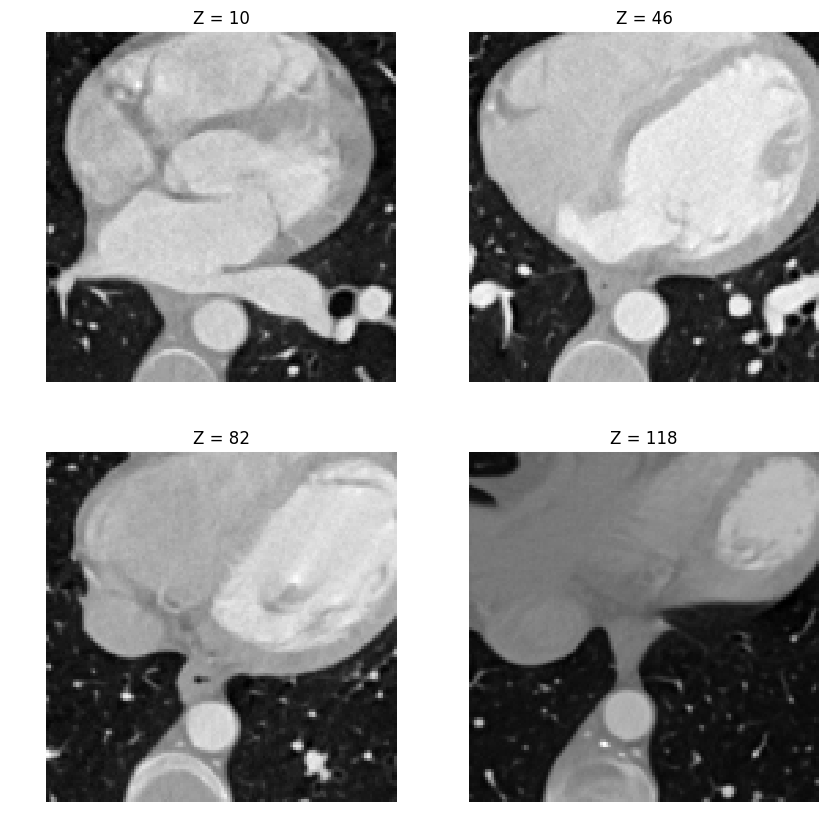

In [5]:
slices = Array{Int64,1}(round(linspace(10, n-10, 4)))
figure(figsize = (10,10))

for i in 1:length(slices)
    s = slices[i]
    NtToolBox.imageplot(M[:, :, s], @sprintf("Z = %i", s), [2, 2, i])
end

We can display an isosurface of the dataset (here we sub-sample to speed
up the computation).

In [17]:
#NtToolBox.isosurface(M, .5, 3)


HomogenousMesh(
)


3D Haar Transform
-----------------
An isotropic 3D Haar transform recursively extracts details wavelet
coefficients by performing local averages/differences along the X/Y/Z axis.


We apply a step of Haar transform in the X/Y/Z direction

Initialize the transform

In [6]:
MW = copy(M)

128×128×128 Array{Float64,3}:
[:, :, 1] =
 0.0745098  0.0705882  0.0901961  …  0.0705882  0.0509804  0.109804 
 0.0745098  0.0666667  0.0784314     0.054902   0.0627451  0.0745098
 0.0666667  0.0784314  0.0745098     0.0745098  0.0745098  0.0784314
 0.0784314  0.0784314  0.0941176     0.105882   0.0862745  0.0901961
 0.0666667  0.0784314  0.0901961     0.0745098  0.0823529  0.0784314
 0.054902   0.0588235  0.0705882  …  0.0784314  0.0784314  0.0784314
 0.0980392  0.0666667  0.0588235     0.0705882  0.0666667  0.0862745
 0.0980392  0.0784314  0.0666667     0.0941176  0.0823529  0.0901961
 0.0705882  0.0862745  0.0588235     0.0901961  0.101961   0.0941176
 0.0666667  0.0705882  0.0666667     0.0627451  0.101961   0.0980392
 0.0823529  0.0862745  0.0901961  …  0.0784314  0.0901961  0.0862745
 0.0588235  0.0666667  0.0705882     0.0784314  0.0784314  0.0705882
 0.054902   0.054902   0.0470588     0.0627451  0.054902   0.0745098
 ⋮                                ⋱  ⋮                       

Average/difference along X

In [7]:
#MW = np.concatenate(((MW[0:n:2,:,:] + MW[1:n:2,:,:])/np.sqrt(2), (MW[0:n:2,:,:] - MW[1:n:2,:,:])/np.sqrt(2)),0)
MW = cat(1, (MW[1:2:n, :, :] + MW[2:2:n, :, :])./sqrt(2), (MW[1:2:n, :, :] - MW[2:2:n, :, :])./sqrt(2) )

128×128×128 Array{Float64,3}:
[:, :, 1] =
  0.105373     0.0970539    0.119238    …   0.0804161    0.130329  
  0.1026       0.110919     0.119238        0.113692     0.119238  
  0.085962     0.0970539    0.113692        0.113692     0.110919  
  0.138648     0.1026       0.088735        0.105373     0.124784  
  0.0970539    0.110919     0.088735        0.144194     0.135875  
  0.0998268    0.108146     0.113692    …   0.119238     0.110919  
  0.085962     0.0776431    0.0637783       0.088735     0.1026    
  0.0499134    0.0471405    0.0526864       0.110919     0.113692  
  0.0415945    0.0277297    0.0720972       0.108146     0.110919  
  0.0610053    0.0665512    0.335529        0.105373     0.116465  
  0.0942809    0.257886     0.659966    …   0.105373     0.1026    
  0.17747      0.310572     0.316118        0.0665512    0.0665512 
  0.213519     0.158059     0.122011        0.0526864    0.0610053 
  ⋮                                     ⋱                          
  0.03

Average/difference along Y

In [8]:
#MW = np.concatenate(((MW[:,0:n:2,:] + MW[:,1:n:2,:])/np.sqrt(2), (MW[:,0:n:2,:] - MW[:,1:n:2,:])/np.sqrt(2)),1)
MW = cat(2, (MW[:, 1:2:n, :] + MW[:, 2:2:n, :])./sqrt(2), (MW[:, 1:2:n, :] - MW[:, 2:2:n, :])./sqrt(2) )

128×128×128 Array{Float64,3}:
[:, :, 1] =
  0.143137     0.166667     0.158824    …   0.0196078   -0.0352941 
  0.15098      0.170588     0.2            -0.0176471   -0.00392157
  0.129412     0.17451      0.256863        0.0          0.00196078
  0.170588     0.133333     0.260784        0.0196078   -0.0137255 
  0.147059     0.111765     0.109804        0.0          0.00588235
  0.147059     0.160784     0.107843    …   0.00784314   0.00588235
  0.115686     0.0980392    0.0882353       0.0137255   -0.00980392
  0.0686275    0.0647059    0.47451        -0.0156863   -0.00196078
  0.0490196    0.235294     0.905882       -0.00588235  -0.00196078
  0.0901961    0.745098     0.452941        0.00196078  -0.00784314
  0.24902      0.852941     0.156863    …  -0.00784314   0.00196078
  0.345098     0.362745     0.15098         0.00784314   0.0       
  0.262745     0.17451      0.194118        0.0137255   -0.00588235
  ⋮                                     ⋱                          
  0.05

Average/difference along Z

In [9]:
# MW = np.concatenate(((MW[:,:,0:n:2] + MW[:,:,1:n:2])/np.sqrt(2), (MW[:,:,0:n:2] - MW[:,:,1:n:2])/np.sqrt(2)),2)
MW = cat(3, (MW[:, :, 1:2:n] + MW[:, :, 2:2:n])./sqrt(2), (MW[:, :, 1:2:n] - MW[:, :, 2:2:n])./sqrt(2) )

128×128×128 Array{Float64,3}:
[:, :, 1] =
  0.20104       0.209359     0.213519    …   0.0221837   -0.0332756 
  0.199654      0.202427     0.27591        -0.0207973   -0.0138648 
  0.192721      0.206586     0.32721        -0.00277297   0.00554594
  0.22461       0.191335     0.341075        0.0249567   -0.0138648 
  0.171924      0.130329     0.206586       -0.00693242  -0.0124784 
  0.22877       0.2052       0.141421    …   0.00693242  -0.0083189 
  0.166378      0.135875     0.101213        0.0124784   -0.0110919 
  0.115078      0.083189     0.621145       -0.00415945  -0.0083189 
  0.1026        0.285616     1.26309        -0.00970539  -0.00554594
  0.146967      0.999655     0.689082        0.00415945  -0.0194108 
  0.332756      0.967766     0.235702    …  -0.0124784    0.00277297
  0.375737      0.368805     0.202427        0.0          0.00138648
  0.313345      0.22877      0.259272        0.00554594  -0.0152513 
  ⋮                                      ⋱                   

Display a horizontal and vertical slice to see the structure of the coefficients.

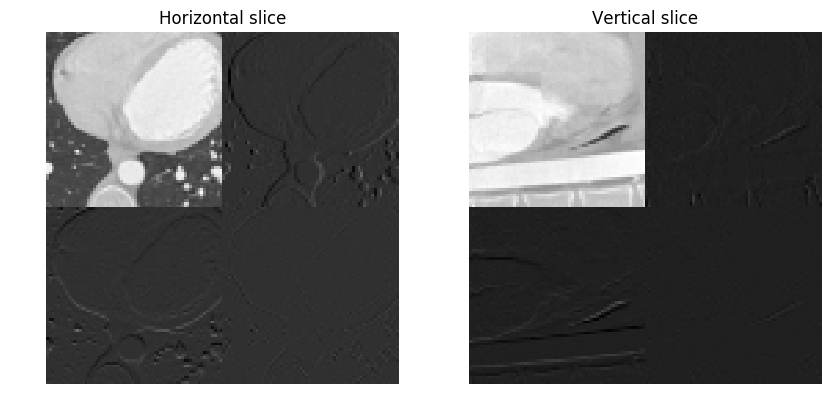

PyObject <matplotlib.text.Text object at 0x000000001F053EB8>

In [10]:
figure(figsize = (10, 5))
imageplot(MW[:, :, 30], "Horizontal slice", [1,2,1])
imageplot((MW[:, 30, :]), "Vertical slice", [1,2,2])

__Exercise 1__

Implement the forward wavelet transform by iteratively applying these
transform steps to the low pass residual.

In [11]:
# run -i nt_solutions/multidim_2_volumetric/exo1
include("Exos\\multidim_2_volumetric\\exo1.jl")

In [13]:
## Insert your code here.

Volumetric Data Haar Approximation
----------------------------------
An approximation is obtained by keeping only the largest coefficients.


We threshold the coefficients to perform $m$-term approximation.

number of kept coefficients

In [12]:
m = Int(round(.01*n^3))
MWT = NtToolBox.perform_thresholding(MW, m, "largest")


128×128×128 Array{Float64,3}:
[:, :, 1] =
 555.925     -18.3139    -48.8614    …  -0.0   0.0  -0.0  -0.0   0.0  -0.0
 157.487     -61.8607    -70.8892       -0.0   0.0  -0.0  -0.0  -0.0  -0.0
 -14.0817    -18.8766    -12.6481       -0.0  -0.0   0.0   0.0  -0.0   0.0
  36.7586     44.7234      9.00191       0.0  -0.0   0.0   0.0   0.0  -0.0
 -15.8232     -0.494195    3.51339       0.0  -0.0  -0.0   0.0  -0.0  -0.0
   5.89137    -2.4172     -1.04443   …  -0.0  -0.0   0.0   0.0   0.0  -0.0
  -4.33506     5.77401     7.33149       0.0   0.0  -0.0   0.0   0.0  -0.0
   1.92999    -7.23443    18.0842       -0.0   0.0   0.0  -0.0  -0.0  -0.0
  -0.512868   -8.16673    -4.15018       0.0  -0.0   0.0   0.0  -0.0  -0.0
  -3.02181    -0.0         2.3742        0.0  -0.0  -0.0  -0.0   0.0  -0.0
  -0.0        -0.0        -1.61961   …   0.0   0.0   0.0  -0.0  -0.0   0.0
   2.17831     0.95864    -0.717034     -0.0   0.0   0.0   0.0   0.0   0.0
  -0.485355   -2.41679    -0.0          -0.0  -0.0  -0.0  

__Exercise 2__

Implement the backward transform to compute an approximation $M_1$ from
the coefficients MWT.

In [13]:
# run -i nt_solutions/multidim_2_volumetric/exo2
include("Exos\\multidim_2_volumetric\\exo2.jl")

In [16]:
## Insert your code here.

Display the approximation as slices.

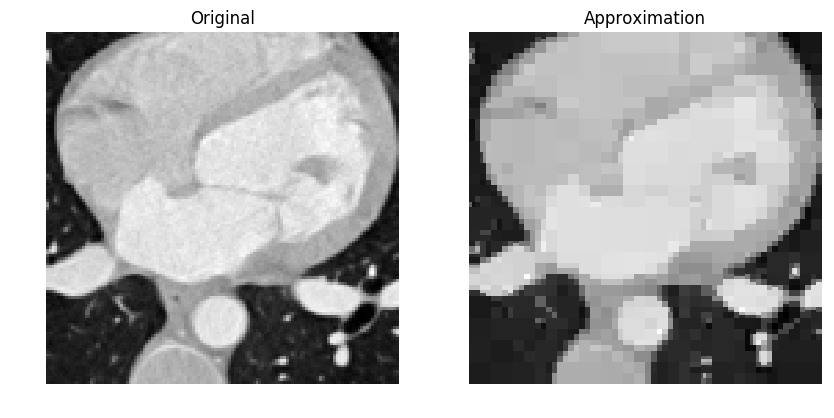

PyObject <matplotlib.text.Text object at 0x000000001EC29AC8>

In [14]:
s = 30

figure(figsize = (10, 5))
imageplot(M[:, :, s], "Original", [1, 2, 1])
imageplot(clamP(M1[:, :, s]), "Approximation", [1,2,2])

Display the approximated isosurface.

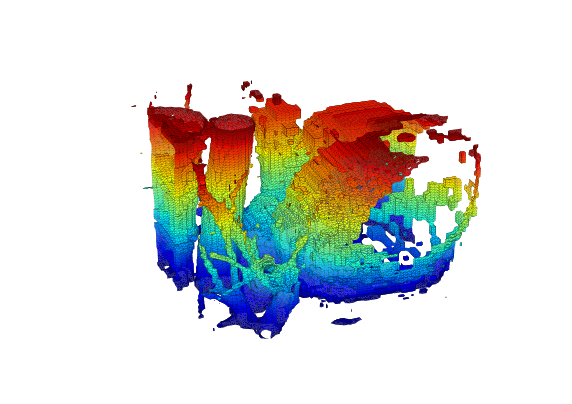

In [18]:
# isosurface(M1,.5,2)

Linear Volumetric Denoising 
----------------------------
Linear denoising is obtained by low pass filtering.


We add a Gaussian noise to the image.

In [15]:
sigma = .06
Mnoisy = M + sigma.*randn(n, n, n)

128×128×128 Array{Float64,3}:
[:, :, 1] =
  0.115991     0.0513996   0.0569284   …   0.0452959    0.0641839 
  0.0712633    0.0947538  -0.113513        0.0638967    0.0152041 
  0.0913812    0.0338529   0.0489313       0.0933852    0.110954  
  0.0280866    0.0769747   0.0555312      -0.00589491   0.0962558 
  0.0277291    0.103721    0.0317477       0.0296399    0.0982718 
  0.0505882    0.111845    0.0905569   …   0.134387     0.0932325 
  0.160037     0.19894     0.0694046       0.143897     0.0153933 
  0.0734456    0.0599484   0.0581058      -0.0287064    0.0469337 
  0.00297263   0.102566    0.187287        0.13843      0.0784308 
  0.0688044    0.0655882   0.0755422       0.113       -0.0359126 
  0.130031     0.0966276   0.0914632   …   0.0385289    0.11822   
  0.0390127    0.104914    0.0552657       0.0737269   -0.0038697 
  0.12079      0.0684351   0.044258       -0.034514     0.0350946 
  ⋮                                    ⋱                          
  0.152776     0.105

Display slices of the noisy data.

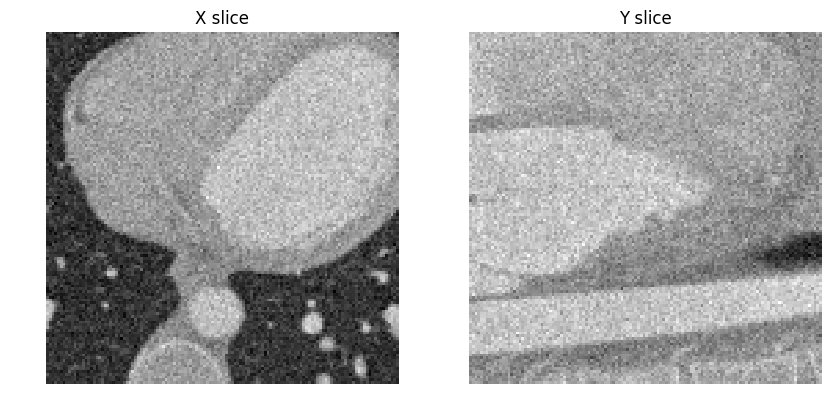

PyObject <matplotlib.text.Text object at 0x000000002B40E128>

In [16]:
figure(figsize = (10, 5))
imageplot(Mnoisy[:, :, Base.div(n, 2)], "X slice", [1,2,1])
imageplot(Mnoisy[:, Base.div(n, 2), :], "Y slice", [1,2,2])

A simple denoising method performs a linear filtering of the data.


We build a Gaussian filter of width $\sigma$.

Construct a 3D grid

In [17]:
x = -Base.div(n, 2) : Base.div(n, 2) - 1
include("ndgrid.jl")
(X, Y, Z) = meshgrid(x, x, x)

(
[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63]

[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63]

[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63]

...

[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63]

[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63]

[-64 -63 … 62 63; -64 -63 … 62 63; … ; -64 -63 … 62 63; -64 -63 … 62 63],

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63]

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63]

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63]

...

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63]

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63]

[-64 -64 … -64 -64; -63 -63 … -63 -63; … ; 62 62 … 62 62; 63 63 … 63 63],

[-64 -64 … -64 -64; -64 -64 … -64 -64; … ; -64 -64 … -64 -64; -64 -64 … -64 -64]

[-63 -63 … -63 -

Gaussian filter

In [18]:
s = 2 #width
h = exp(-(X.^2 + Y.^2 + Z.^2)./(2*s^2))
h = h/sum(h)

128×128×128 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0

The filtering is computed over the Fourier domain.

In [19]:
Mh = real( plan_ifft((plan_fft(Mnoisy)*Mnoisy) .* (plan_fft(fftshift(h))*fftshift(h)) )*((plan_fft(Mnoisy)*Mnoisy) .* (plan_fft(fftshift(h))*fftshift(h)) ) )

128×128×128 Array{Float64,3}:
[:, :, 1] =
 0.120786   0.113209   0.108426   …  0.14659    0.138774   0.129869 
 0.140121   0.130247   0.123542      0.171591   0.162153   0.151391 
 0.160247   0.150272   0.143522      0.192154   0.182335   0.171524 
 0.179563   0.171488   0.166456      0.208025   0.198559   0.18902  
 0.196684   0.191401   0.188911      0.220881   0.211703   0.20368  
 0.210675   0.207725   0.207427   …  0.232448   0.223012   0.215827 
 0.221448   0.219489   0.220197      0.24351    0.233347   0.226033 
 0.229612   0.227171   0.227508      0.254018   0.243011   0.234849 
 0.235685   0.231764   0.230759      0.263474   0.251699   0.242333 
 0.23951    0.233815   0.231228      0.271093   0.258531   0.24782  
 0.240516   0.233393   0.229729   …  0.275947   0.262417   0.250341 
 0.238555   0.230778   0.227106      0.277422   0.26276    0.249459 
 0.234541   0.227085   0.224767      0.275861   0.260129   0.245923 
 ⋮                                ⋱  ⋮                       

Display denoised slices.

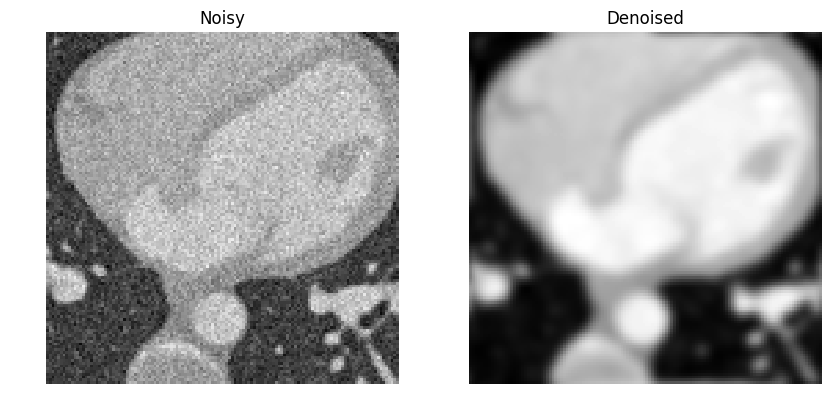

PyObject <matplotlib.text.Text object at 0x000000002B7415F8>

In [20]:
i = 40
figure(figsize = (10, 5))
imageplot(Mnoisy[:, :, i], "Noisy", [1, 2, 1])
imageplot(Mh[:, :, i], "Denoised", [1, 2, 2])

Display denoised iso-surface.

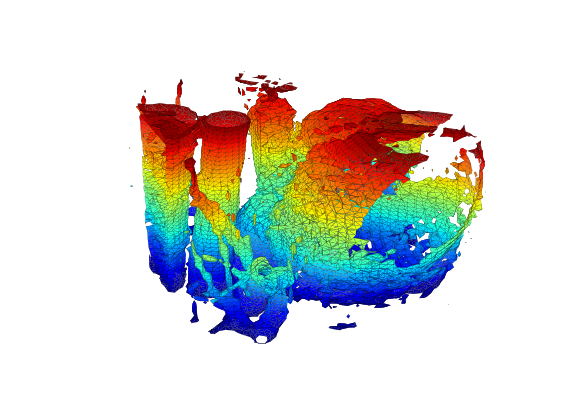

In [25]:
isosurface(M,.5,3)

__Exercise 3__

Select the optimal blurring width $s$ to reach the smallest possible
SNR. Keep the optimal denoising Mblur.

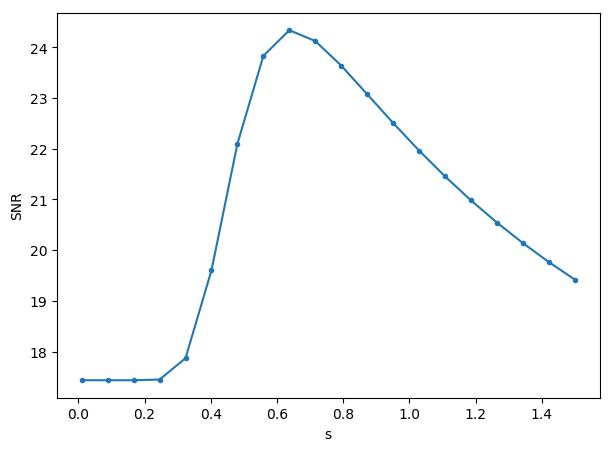

In [27]:
# run -i nt_solutions/multidim_2_volumetric/exo3
include("Exos\\multidim_2_volumetric\\exo3.jl")


In [27]:
## Insert your code here.

Display optimally denoised iso-surface.

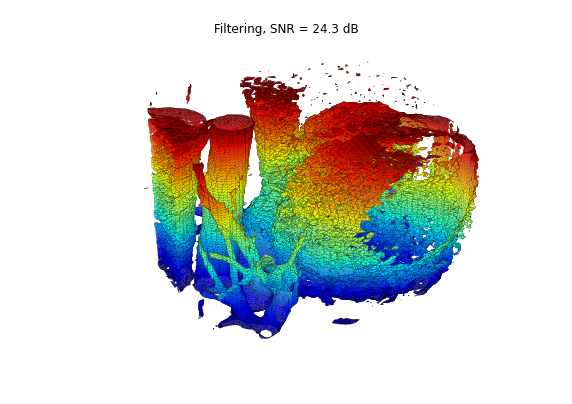

In [28]:
isosurface(Mblur,.5,2,"Filtering, SNR = %.1f dB" %snr(M, Mblur))

Non-Linear Wavelet Volumetric Denoising 
----------------------------------------
Denoising is obtained by removing small amplitude coefficients that
corresponds to noise.

__Exercise 4__

Perforn Wavelet denoising by thresholding the wavelet coefficients of
Mnoisy. Test both hard thresholding and soft thresholding to determine
the optimal threshold and the corresponding SNR.
Record the optimal result Mwav.

In [36]:
# run -i nt_solutions/multidim_2_volumetric/exo4
# include("Exos\\multidim_2_volumetric\\exo4.jl")
# perform_haar_transf(Mnoisy, 1, +1)
# j=5
# p = Int(n/2^(j-1))
# sel = 1 : p
# even = 1 : 2 : p
# odd = 2 : 2 : p
cat(1, (Mnoisy[even, sel, sel] + Mnoisy[odd, sel, sel])./sqrt(2), (Mnoisy[even, sel, sel] - Mnoisy[odd, sel, sel])./sqrt(2))

8×8×8 Array{Float64,3}:
[:, :, 1] =
  0.132409    0.103346   -0.0400116   …   0.0962642   0.124579    0.10163  
  0.0844765   0.078367    0.0738661       0.238765    0.193301    0.102865 
  0.0553787   0.152428    0.0864824       0.157869    0.244888    0.168443 
  0.165097    0.183062    0.0901635       0.25266     0.235346    0.173911 
  0.0316271  -0.030656    0.120521       -0.0195746  -0.105071   -0.0212618
  0.0447561  -0.0304917  -0.00466682  …   0.0303302   0.0142656   0.031757 
 -0.0161638  -0.0057444  -0.0415844       0.026357   -0.106551   -0.0186039
  0.0612291   0.0982822   0.00798951      0.0965218   0.091175    0.0513073

[:, :, 2] =
  0.0833851    0.0572056   0.159631   …   0.0687278   0.167998    0.0394412
  0.257199     0.0334876   0.0701697      0.146067    0.0788632   0.093699 
  0.193435     0.0418927   0.0311676      0.24191     0.285807    0.0979451
  0.0859926    0.152858    0.197602       0.123514    0.295904    0.100923 
 -0.0619306    0.0298382  -0.100015    

In [30]:
## Insert your code here.

Display denoised iso-surface with optimal soft thresholding.

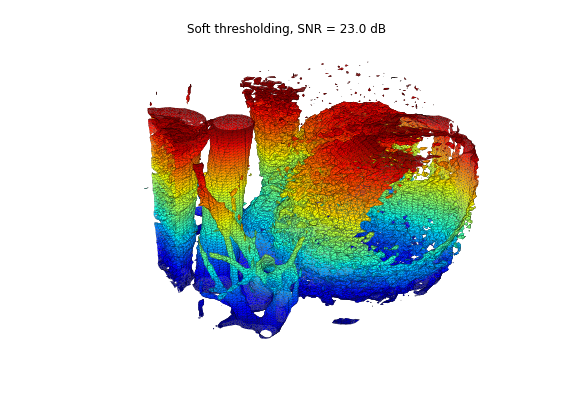

In [31]:
isosurface(Mblur,.5,2,"Soft thresholding, SNR = %.1f dB" %snr(M, Mwav))

Orthogonal wavelet thresholdings suffers from blocking artifacts.
This can be aleviated by performing a cycle spinning denoising, which
averages the denosing result of translated version of the signal.


A typical cycle spinning process is like this.

Maximum translation.

In [32]:
w = 4

List of translations.

In [33]:
[dZ, dX, dY] = np.meshgrid(np.arange(0,w),np.arange(0,w),np.arange(0,w))
dX = np.ravel(dX)
dY = np.ravel(dY)
dZ = np.ravel(dZ)

Initialize spinning process.

In [34]:
Mspin = np.zeros([n,n,n])

Spin.

In [ ]:
def circshift(x,v):
    x = np.roll(x,v[0], axis = 0)
    x = np.roll(x,v[1], axis = 1)
    x = np.roll(x,v[2], axis = 2)
    return x

for i in range(w**3):
    # shift the image
    MnoisyC = circshift(Mnoisy, [dX[i],dY[i],dZ[i]])
    # denoise the image to get a result M1
    M1 = MnoisyC; # replace this line by some denoising
    # shift inverse
    M1 = circshift(M1, [-dX[i],-dY[i],-dZ[i]])
    # average the result
    Mspin = Mspin*(i)/(i+1) + M1/(i+1)

__Exercise 5__

Implement cycle spinning hard thresholding with $T=3\sigma$.

In [ ]:
run -i nt_solutions/multidim_2_volumetric/exo5

In [ ]:
## Insert your code here.

Display denoised iso-surface.

In [ ]:
isosurface(Mspin,.5,2,"Cycle spinning, SNR = %.1f dB" %snr(M, Mspin))